In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/saikarthik/Desktop/xai /nasdq.csv', index_col=0, parse_dates=True)



In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])



In [4]:
def create_sequences(data, seq_length=60):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])  # Sequence of past 60 days
        y.append(data[i, 0])  # Next day's price
    return np.array(x), np.array(y)

x, y = create_sequences(scaled_data)


In [5]:
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  

model.compile(optimizer='adam', loss='mean_squared_error')


2024-11-19 12:24:15.541498: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-11-19 12:24:15.541530: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-19 12:24:15.541535: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-19 12:24:15.541599: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-19 12:24:15.541791: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Step 7: Make predictions
predicted_prices = model.predict(x_test)

# Step 8: Inverse transform the predictions and the true values to original scale
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/10


2024-11-19 12:24:16.901870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-19 12:24:17.123373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-19 12:24:17.194916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-19 12:24:17.334631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-19 12:24:17.467535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


97/97 [==============================] - 3s 19ms/step - loss: 0.0030
Epoch 2/10
97/97 [==============================] - 2s 19ms/step - loss: 1.3320e-04
Epoch 3/10
97/97 [==============================] - 2s 20ms/step - loss: 1.3169e-04
Epoch 4/10
97/97 [==============================] - 2s 19ms/step - loss: 1.2695e-04
Epoch 5/10
97/97 [==============================] - 2s 19ms/step - loss: 1.2315e-04
Epoch 6/10
97/97 [==============================] - 2s 19ms/step - loss: 1.2953e-04
Epoch 7/10
97/97 [==============================] - 2s 19ms/step - loss: 1.2567e-04
Epoch 8/10
97/97 [==============================] - 2s 20ms/step - loss: 1.1209e-04
Epoch 9/10
97/97 [==============================] - 2s 19ms/step - loss: 1.2691e-04
Epoch 10/10
 1/25 [>.............................] - ETA: 9s

2024-11-19 12:24:36.357731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-19 12:24:36.428659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-19 12:24:36.481149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 8ms/step


In [8]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test_rescaled, predicted_prices)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(y_test_rescaled, predicted_prices)
print(f"R-Squared (R²): {r2}")

mse = mean_squared_error(y_test_rescaled, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 1.5850255261403954
R-Squared (R²): 0.9149505375013898
Mean Squared Error (MSE): 3.9074679939088903


Root Mean Squared Error: 1.976731644383954


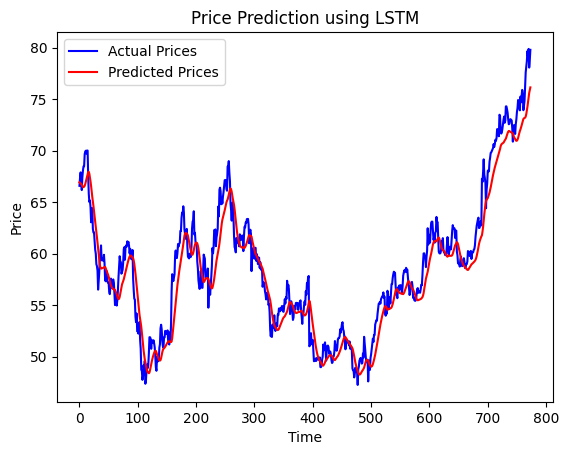

In [9]:
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predicted_prices))
print(f"Root Mean Squared Error: {rmse}")

# Step 10: Plot the predictions vs. actual values
plt.plot(y_test_rescaled, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
model.save('lstm_model.h5')  


/Users/saikarthik/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
last_sequence = scaled_data[-60:]  
last_sequence = last_sequence.reshape(1, 60, 1) 

next_day_prediction = model.predict(last_sequence)
next_day_prediction = scaler.inverse_transform(next_day_prediction)  

print(f"Next day's predicted price: {next_day_prediction[0][0]}")


1/1 [==============================] - 0s 49ms/step
Next day's predicted price: 76.40289306640625


In [12]:
# Predicting the next week's prices (5 days)
predictions_week = []
current_sequence = scaled_data[-60:]  

for _ in range(5): 
    current_sequence = current_sequence.reshape(1, 60, 1)
    next_day_pred = model.predict(current_sequence)
    next_day_pred_rescaled = scaler.inverse_transform(next_day_pred)
    predictions_week.append(next_day_pred_rescaled[0][0])
    current_sequence = np.append(current_sequence[0][1:], next_day_pred)  # Shift the sequence for next prediction

print("Predicted prices for next week:", predictions_week)


1/1 [==============================] - 0s 16ms/step
Predicted prices for next week: [76.40289, 76.42416, 76.33699, 76.18019, 75.980484]


In [13]:
print(np.mean(predictions_week))

76.26494


In [14]:
# Predicting the next month's prices (20 days)
predictions_month = []
current_sequence = scaled_data[-60:]  

for _ in range(20):  
    current_sequence = current_sequence.reshape(1, 60, 1)
    next_day_pred = model.predict(current_sequence)
    next_day_pred_rescaled = scaler.inverse_transform(next_day_pred)
    predictions_month.append(next_day_pred_rescaled[0][0])
    current_sequence = np.append(current_sequence[0][1:], next_day_pred)  # Shift the sequence for next prediction

print("Predicted prices for next month:", predictions_month)


1/1 [==============================] - 0s 14ms/step
Predicted prices for next month: [76.40289, 76.42416, 76.33699, 76.18019, 75.980484, 75.75514, 75.515175, 75.26746, 75.01628, 74.76422, 74.51286, 74.26318, 74.015724, 73.77082, 73.52867, 73.28937, 73.05296, 72.81946, 72.588875, 72.36116]


In [15]:
np.mean((predictions_month))

74.59231

In [16]:
predictions_year = []
current_sequence = scaled_data[-60:]  

for _ in range(252): 
    current_sequence = current_sequence.reshape(1, 60, 1)
    next_day_pred = model.predict(current_sequence)
    next_day_pred_rescaled = scaler.inverse_transform(next_day_pred)
    predictions_year.append(next_day_pred_rescaled[0][0])
    current_sequence = np.append(current_sequence[0][1:], next_day_pred)  

print("Predicted prices for next year:", predictions_year)


1/1 [==============================] - 0s 14ms/step
Predicted prices for next year: [76.40289, 76.42416, 76.33699, 76.18019, 75.980484, 75.75514, 75.515175, 75.26746, 75.01628, 74.76422, 74.51286, 74.26318, 74.015724, 73.77082, 73.52867, 73.28937, 73.05296, 72.81946, 72.588875, 72.36116, 72.13631, 71.914246, 71.694954, 71.47838, 71.26448, 71.05319, 70.84448, 70.63828, 70.43455, 70.23323, 70.03428, 69.83765, 69.64329, 69.45114, 69.26118, 69.073326, 68.88756, 68.70385, 68.522125, 68.34236, 68.16451, 67.98854, 67.8144, 67.64207, 67.4715, 67.30265, 67.135506, 66.97001, 66.80616, 66.64389, 66.48319, 66.32402, 66.16636, 66.01017, 65.85543, 65.70211, 65.550186, 65.399635, 65.25041, 65.10252, 64.955925, 64.81059, 64.66652, 64.52366, 64.38202, 64.24155, 64.10225, 63.964092, 63.827053, 63.69112, 63.556263, 63.422478, 63.289745, 63.15804, 63.027336, 62.897644, 62.768917, 62.641163, 62.514362, 62.388485, 62.263527, 62.139473, 62.016304, 61.89401, 61.772575, 61.651985, 61.53223, 61.413296, 61.29517

In [17]:
np.mean((predictions_year))

58.84723

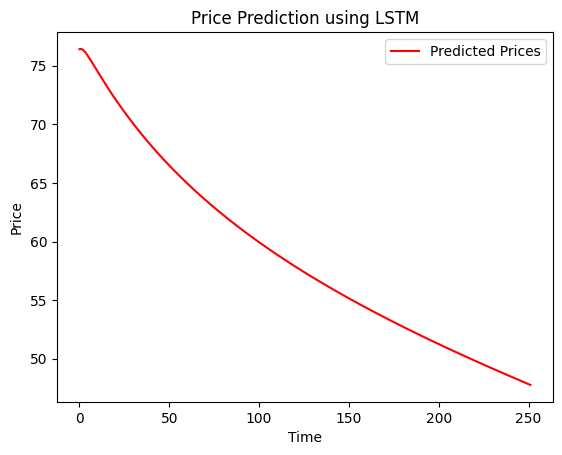

In [18]:
plt.plot(predictions_year, color='red', label='Predicted Prices')
plt.title('Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()